<a href="https://colab.research.google.com/github/vijayeshwari/Data-Science-Specialization-Captone-Project/blob/master/PDS_Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**a) Converting the text corpus into tokens**

In [1]:
import pandas as pd
import nltk
import re

In [3]:
# load the dataset into a pandas DataFrame
df = pd.read_csv('Corona_NLP_test.csv')

In [4]:
# remove URLs, punctuation, and special characters from the text data
df['OriginalTweet'] = df['OriginalTweet'].apply(lambda x: re.sub(r'http\S+', '', x)) # remove URLs
df['OriginalTweet'] = df['OriginalTweet'].apply(lambda x: re.sub(r'[^\w\s]', '', x)) # remove punctuation and special characters

In [5]:
# convert all text to lowercase
df['OriginalTweet'] = df['OriginalTweet'].apply(lambda x: x.lower())

In [7]:
# tokenize the text data using nltk's word_tokenize function
import nltk
nltk.download('punkt')
df['Tokens'] = df['OriginalTweet'].apply(lambda x: nltk.word_tokenize(x))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [8]:
print(df.head()) #first few rows of the DataFrame

   UserName  ScreenName             Location     TweetAt  \
0         1       44953                  NYC  02-03-2020   
1         2       44954          Seattle, WA  02-03-2020   
2         3       44955                  NaN  02-03-2020   
3         4       44956          Chicagoland  02-03-2020   
4         5       44957  Melbourne, Victoria  03-03-2020   

                                       OriginalTweet           Sentiment  \
0  trending new yorkers encounter empty supermark...  Extremely Negative   
1  when i couldnt find hand sanitizer at fred mey...            Positive   
2  find out how you can protect yourself and love...  Extremely Positive   
3  panic buying hits newyork city as anxious shop...            Negative   
4  toiletpaper dunnypaper coronavirus coronavirus...             Neutral   

                                              Tokens  
0  [trending, new, yorkers, encounter, empty, sup...  
1  [when, i, couldnt, find, hand, sanitizer, at, ...  
2  [find, out, ho

In [9]:
print(df.columns)

Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment', 'Tokens'],
      dtype='object')


**b) Performing stop word removal**

In [10]:
from nltk.corpus import stopwords

In [11]:
#To download the 'stopwords' resource
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [12]:
# remove stop words from the tokenized text data
stop_words = set(stopwords.words('english')) # get the set of English stop words
df['Tokens'] = df['Tokens'].apply(lambda x: [word for word in x if word not in stop_words])

In [13]:
print(df['Tokens'])

0       [trending, new, yorkers, encounter, empty, sup...
1       [couldnt, find, hand, sanitizer, fred, meyer, ...
2               [find, protect, loved, ones, coronavirus]
3       [panic, buying, hits, newyork, city, anxious, ...
4       [toiletpaper, dunnypaper, coronavirus, coronav...
                              ...                        
3793    [meanwhile, supermarket, israel, people, dance...
3794    [panic, buy, lot, nonperishable, items, echo, ...
3795    [asst, prof, economics, cconces, nbcphiladelph...
3796    [gov, need, somethings, instead, biar, je, rak...
3797    [forestandpaper, members, committed, safety, e...
Name: Tokens, Length: 3798, dtype: object


**c)Count Word frequencies**

In [14]:
from nltk import FreqDist

# create a list of all words in the 'Tokens' column
all_words = [word for tokens in df['Tokens'] for word in tokens]

# create a frequency distribution of the words
freq_dist = FreqDist(all_words)

# print the 10 most common words and their frequencies
print(freq_dist.most_common(10))

[('covid_19', 1529), ('coronavirus', 1511), ('food', 1332), ('store', 1008), ('covid19', 968), ('grocery', 815), ('stock', 782), ('people', 774), ('amp', 577), ('shopping', 523)]


**d) Create word clouds.**

In [15]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [16]:
# combine all tokens into a single string
all_text = ' '.join([word for sublist in df['Tokens'] for word in sublist])

In [17]:
# create a word cloud object
wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(all_text)

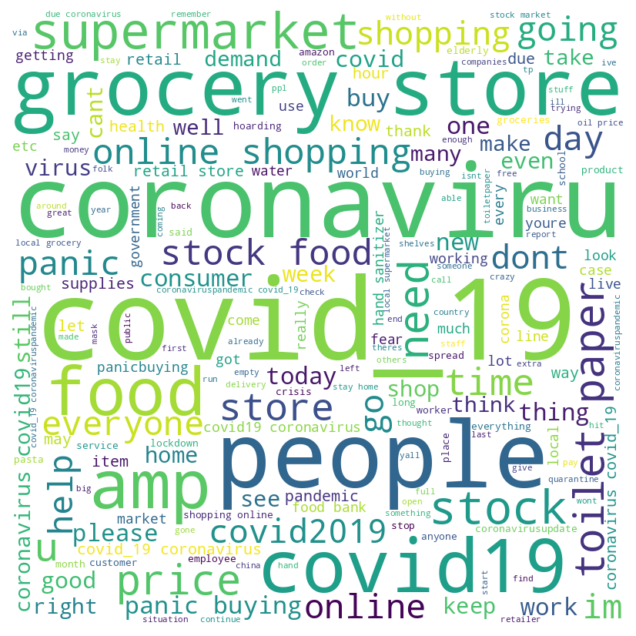

In [18]:
# plot the word cloud
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()